In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
days = []
dataset = []
feature_test = []
target_test = []
feature_train = []
target_train = []
range_data_test = []

In [3]:
df = pd.read_csv("oil-price.csv")

In [4]:
df.head()

,Day,Price
0,1,95.14
1,2,93.66
2,3,93.12
3,4,93.31
4,5,91.90


# Preprocessing

In [5]:
# convert float type into integer so multiplied by 100
for i in range(0,850):
    days.append(int(float(df['Day'][i])))
    
for i in range(0,850):
    dataset.append(int(float(df['Price'][i])*100))

In [6]:
#split data train 80%
range_data_train = int(0.8*(len(dataset)+1))

In [7]:
for i in range(0,range_data_train):
    target_train.append(dataset[i])
    
for i in range(0, range_data_train):
    feature_train.append(days[i])

In [8]:
for i in range(0, len(dataset)):
    target_test.append(dataset[i])
    
for i in range(0, len(dataset)):
    feature_test.append(days[i])

In [9]:
arr_feature_test = np.array(feature_test)
arr_feature_train = np.array(feature_train)

In [10]:
feature_test = arr_feature_test.reshape(-1,1)
feature_train = arr_feature_train.reshape(-1,1)

## SVR Model 

In [11]:
# create SVR model
linear = LinearRegression().fit(feature_test, target_test)
svr_rbf = SVR(kernel='rbf', C=1000, gamma=0.0001).fit(feature_test, target_test)

In [12]:
feature_list = []
target_list = []

In [13]:
for i in range (len(feature_test)):
    feature_list.append(feature_test[i])

In [14]:
for i in range (len(target_test)):
    target_list.append(target_test[i])

In [15]:
# extend a number of days for forecasting the future 
last_day = len(feature_list)
for i in range(1, 366):
    feature_list.append([last_day + i])
    target_list.append(np.nan)

In [16]:
len(target_list)

1215

In [17]:
# divide element by 100 to convert back to float
linear_pred = list(map(lambda x: float(x) / 100, linear.predict(feature_list)))
svr_rbf_pred = list(map(lambda x: float(x) / 100, svr_rbf.predict(feature_list)))
target = list(map(lambda x: float(x) / 100, target_list))

##  Prediction Result

In [18]:
# display the prediction at 1 day, 30 days, and 365 days after the last available data
print('==== Linear regression prediction ====')
print(' - 1 day : ', linear_pred[last_day])
print(' - 30 days : ', linear_pred[last_day + 29])
print(' - 365 days : ', linear_pred[last_day + 364])

print('==== Support vector regression  prediction ====')
print(' - 1 day : ', svr_rbf_pred[last_day])
print(' - 2 days : ', svr_rbf_pred[last_day] + 1)
print(' - 28 days : ', svr_rbf_pred[last_day + 27])
print(' - 29 days : ', svr_rbf_pred[last_day + 28])
print(' - 30 days : ', svr_rbf_pred[last_day + 29])
print(' - 364 days : ', svr_rbf_pred[last_day + 363])
print(' - 365 days : ', svr_rbf_pred[last_day + 364])

==== Linear regression prediction ====
 - 1 day :  21.863016670130946
 - 30 days :  19.404452049736193
 - 365 days :  -8.996208220341122
==== Support vector regression  prediction ====
 - 1 day :  53.166952456928364
 - 2 days :  54.166952456928364
 - 28 days :  62.82671060830136
 - 29 days :  63.128191526815684
 - 30 days :  63.423600260257416
 - 364 days :  61.33463620053092
 - 365 days :  61.33463562284611


C:\Users\Fira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
C:\Users\Fira\Anaconda3\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
C:\Users\Fira\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


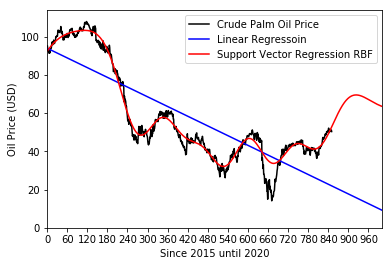

In [19]:
# Plot data output
plt.hold(True)
plt.plot(feature_list, target, color='black', label='Crude Palm Oil Price')
plt.plot(feature_list, linear_pred, color='blue', label='Linear Regressoin')
plt.plot(feature_list, svr_rbf_pred, color='red', label='Support Vector Regression RBF')
plt.xlabel('Since 2015 until 2020')
plt.ylabel('Oil Price (USD)')
plt.gca().set_xlim(left = 0)
plt.gca().set_xlim(right = 1000)
plt.gca().set_ylim(bottom = 0)
plt.xticks(np.arange(0, 1001, 60))
plt.legend()
plt.show()

In [20]:
svr_rbf_mape = []
for i in range (0, 850):
    svr_rbf_mape.append(int(float(svr_rbf_pred[i]) * 100))

In [21]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


## MAPE

In [22]:
mean_absolute_percentage_error(target_test, svr_rbf_mape)

7.141245865727902

## R Square 

In [23]:
r2_score(target_test, svr_rbf_mape)

0.9749686223781932

# Output to Excel File

In [24]:
result = []
result.append("Prediction for 365 days")
nI = len(svr_rbf_pred)
for i in range (920, nI):
    result.append(svr_rbf_pred[i])

In [25]:
result

['Prediction for 365 days',
 69.51978918922264,
 69.52813651228587,
 69.53107417236384,
 69.52873715201919,
 69.5212625259067,
 69.50878923276731,
 69.49145785069375,
 69.46941037596231,
 69.4427900057103,
 69.41174092472288,
 69.37640809657853,
 69.33693705938495,
 69.2934737263237,
 69.24616419120447,
 69.19515453921602,
 69.14059066304347,
 69.08261808450851,
 69.02138178187178,
 68.95702602292349,
 68.8896942039722,
 68.81952869482788,
 68.7466706898609,
 68.67126006520469,
 68.59343524215565,
 68.51333305681104,
 68.43108863597254,
 68.34683527932987,
 68.26070434792734,
 68.17282515890383,
 68.08332488648529,
 67.9923284691979,
 67.89995852325943,
 67.80633526209563,
 67.71157642191963,
 67.61579719330213,
 67.5191101586519,
 67.4216252355176,
 67.32344962561373,
 67.22468776946677,
 67.12544130656967,
 67.02580904092723,
 66.92588691186836,
 66.82576796999568,
 66.72554235813816,
 66.62529729716726,
 66.52511707653362,
 66.42508304937647,
 66.32527363205602,
 66.22576430795482,


In [26]:
import xlsxwriter

workbook = xlsxwriter.Workbook('prediction.xlsx')
worksheet = workbook.add_worksheet()

for row_num, data in enumerate(result):
    worksheet.write(row_num, 0, data)

workbook.close()